In [1]:
from preprocess import data_preprocessing

In [ ]:
# Percorsi dei file
train_file = "/Users/leonardvincentramil/Desktop/Semester Project/ITKTubeTK/results_ITKTubeTK/TotalDatasetVessel.xlsx" 
eval_file = None 
save_train_path = "train_processed.csv"
save_eval_path = "eval_processed.csv"


processor = data_preprocessing.VesselVerseProcessing(
    train_path=train_file,
    eval_path=eval_file,
    train_bool=True,   
    path_csv_saved=save_train_path,
    path_eval_csv_saved=save_eval_path,
    scaling_method="Standard",   # Oppure "MinMax"
    save_df=True                 # Salva il CSV pulito su disco
)

# Esecuzione del preprocessing
print("Inizio Preprocessing...")
X_train, y_train = processor.preprocess()

print("\n--- Risultato Training ---")
print(f"Features finali (X): {X_train.shape}")
print(f"Target (y): {y_train.shape}")

Inizio Preprocessing...
Features dropped due to multicollinearity:
 ['num_loops', 'fractal_dimension', 'num_abnormal_degree_nodes']
Features dropped due to low correlation:
 ['total_length']
Final train shape: (436, 14)

--- Risultato Training ---
Features finali (X): (436, 13)
Target (y): (436,)


In [3]:
from models import model_ML

name model:  logisticregression

evaluation:  {'accuracy': 0.8091603053435115, 'f1_weighted': 0.7919996493945985}



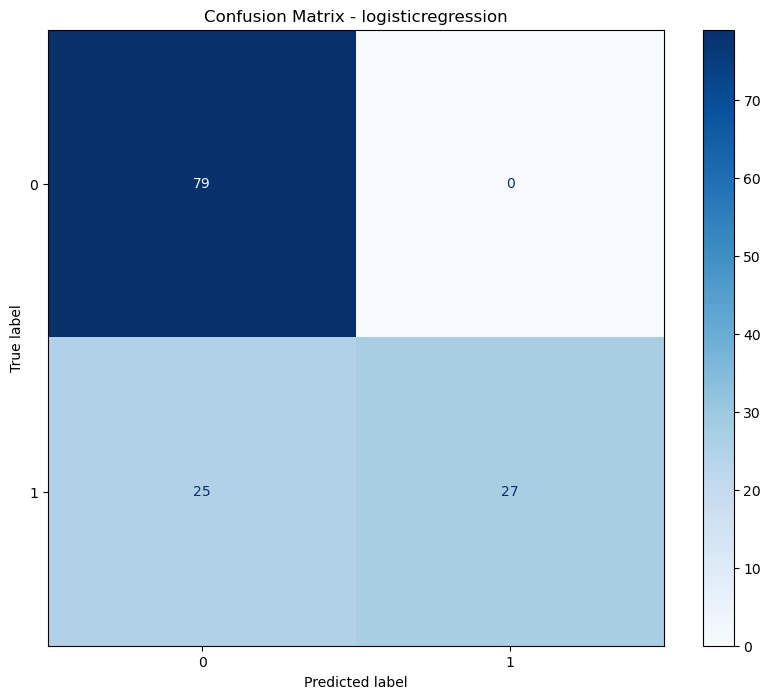

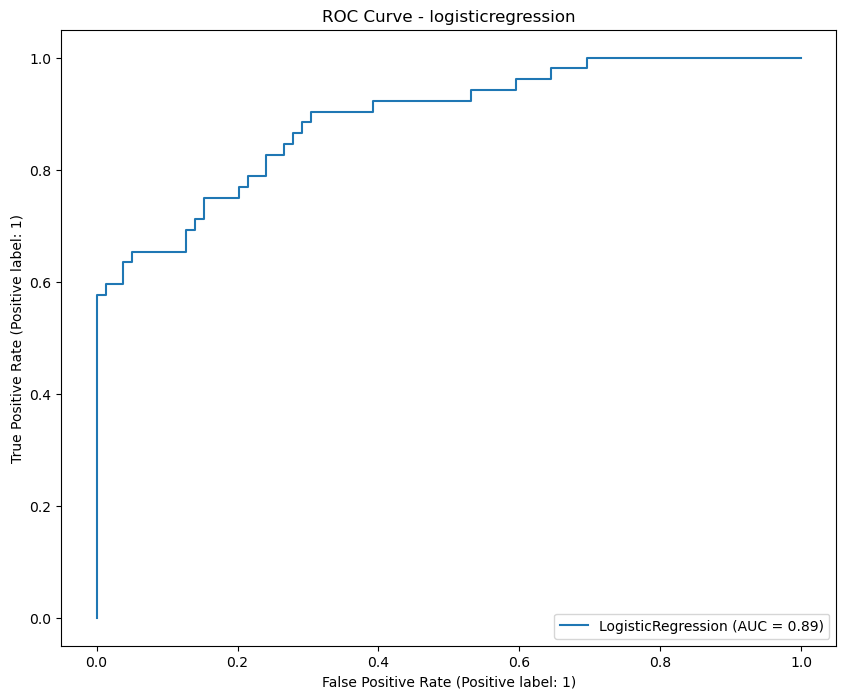

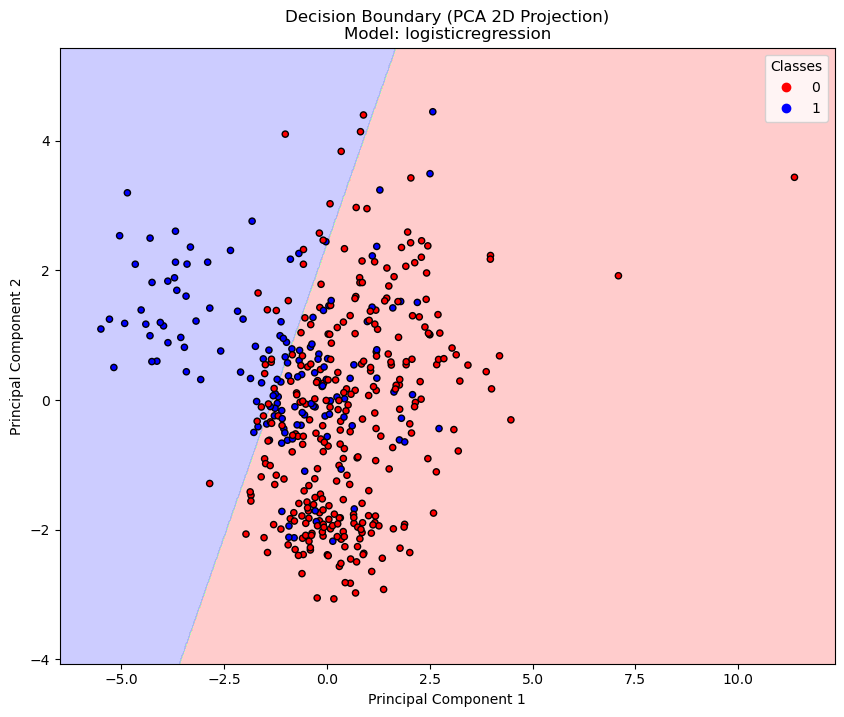

Note: The 2D plot represents 55.94% of the original data variance.
name model:  ridgeclassifier

evaluation:  {'accuracy': 0.8015267175572519, 'f1_weighted': 0.7824704060183649}



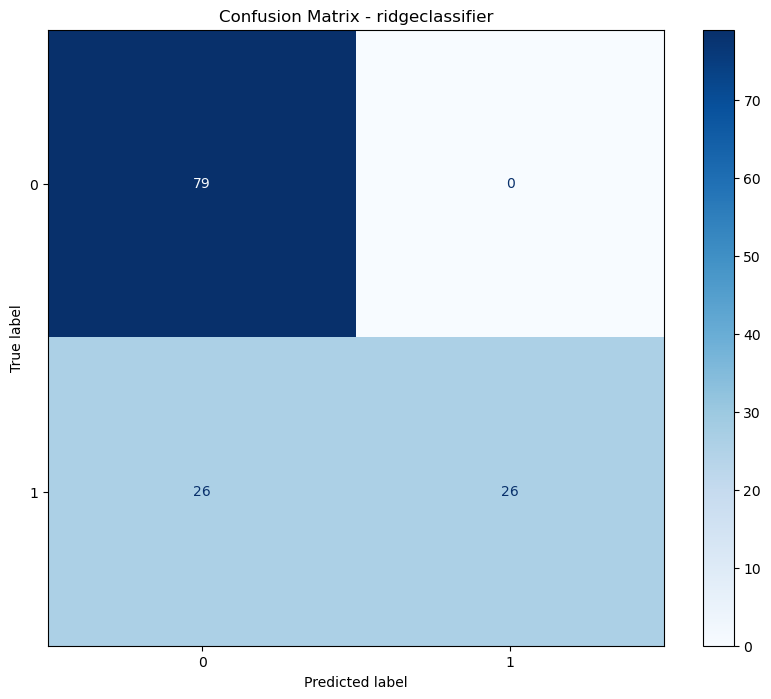

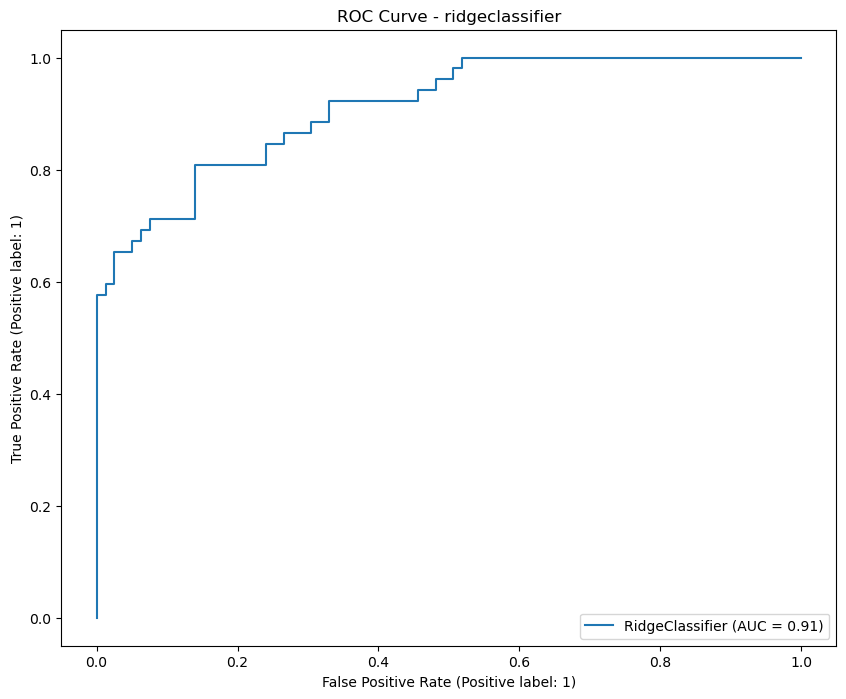

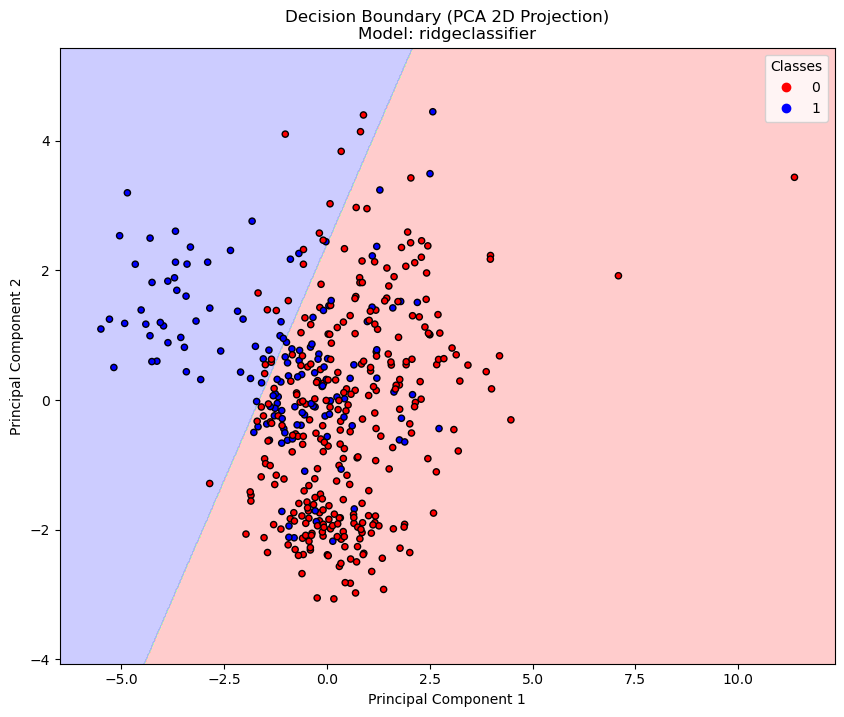

Note: The 2D plot represents 55.94% of the original data variance.
name model:  svc

evaluation:  {'accuracy': 0.7938931297709924, 'f1_weighted': 0.772797740736672}



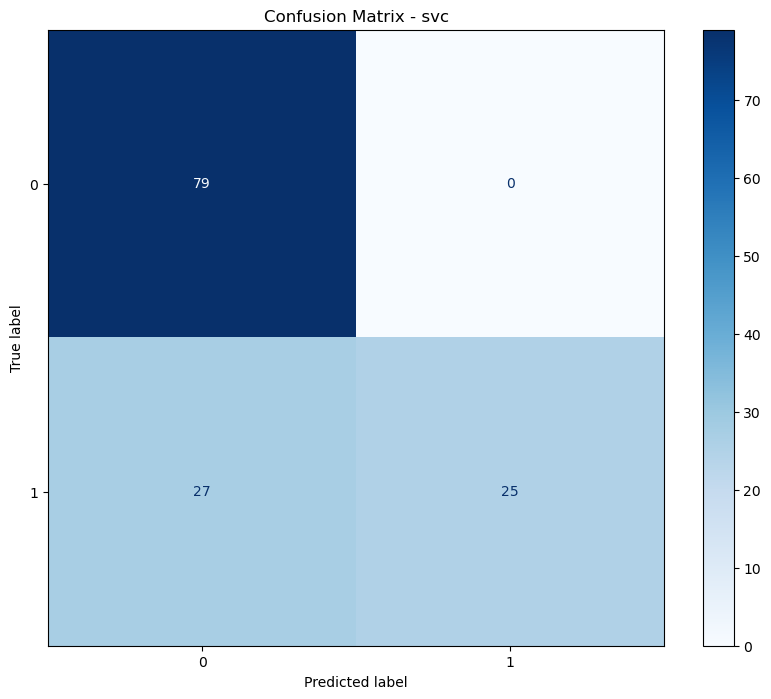

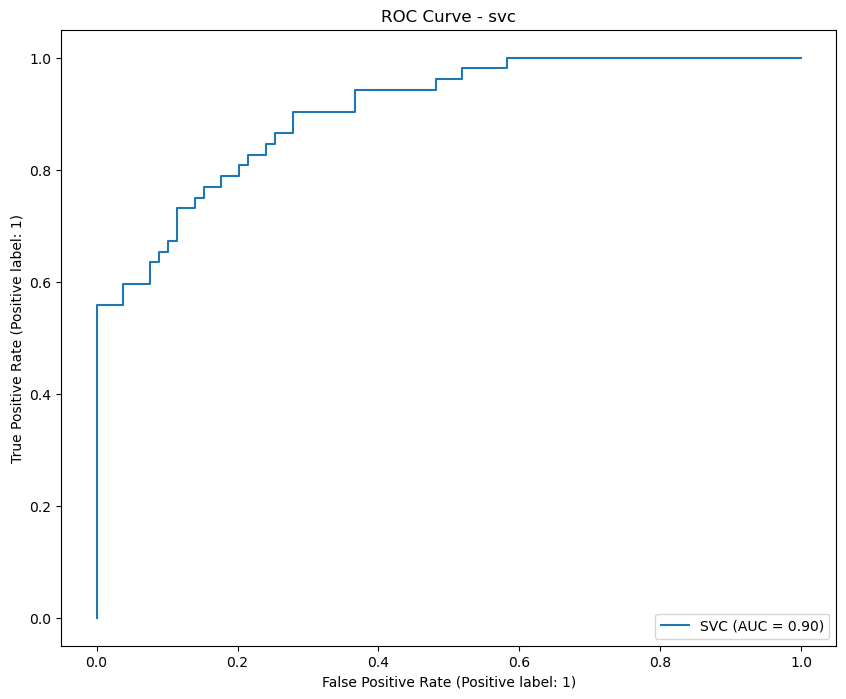

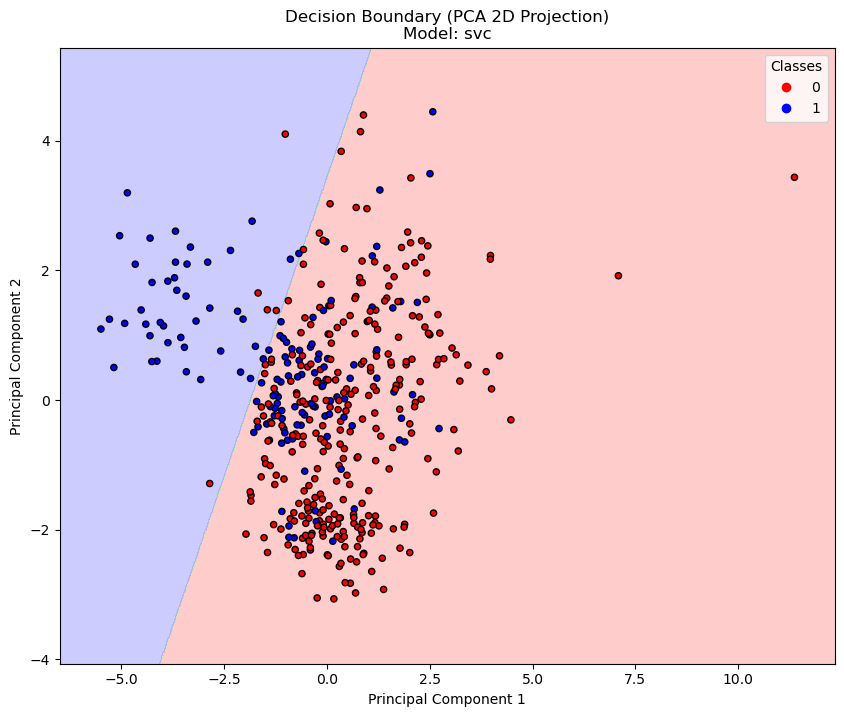

Note: The 2D plot represents 55.94% of the original data variance.
name model:  randomforestclassifier

evaluation:  {'accuracy': 0.7786259541984732, 'f1_weighted': 0.767749909123955}



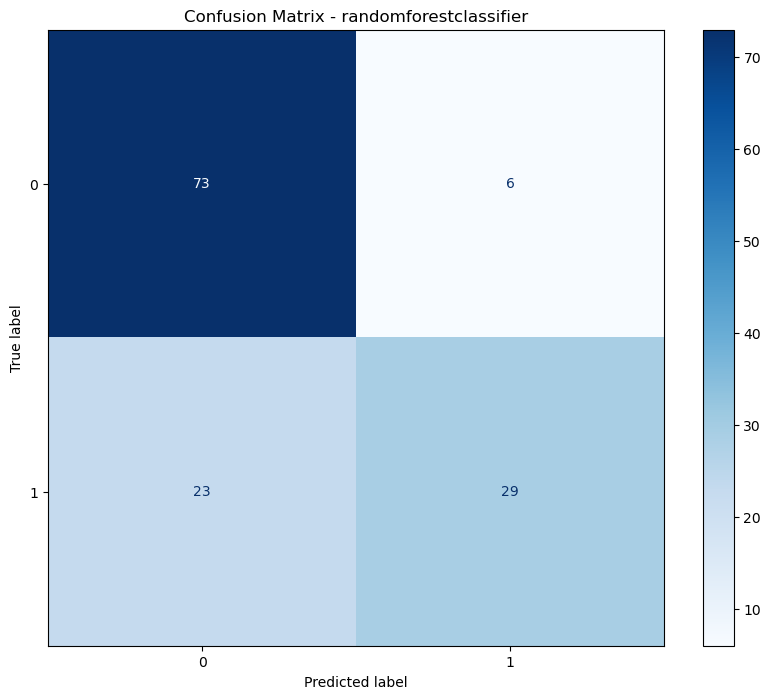

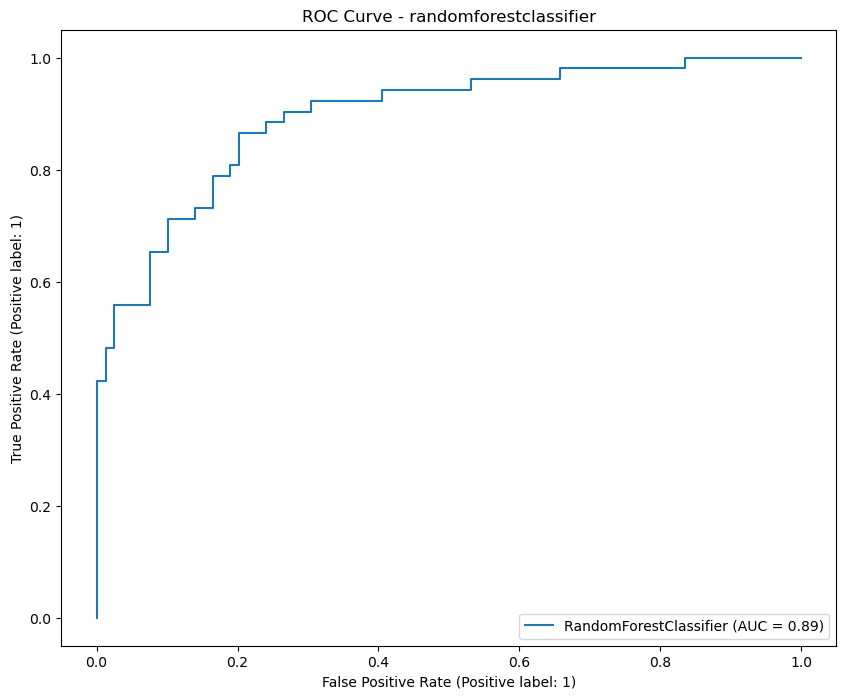

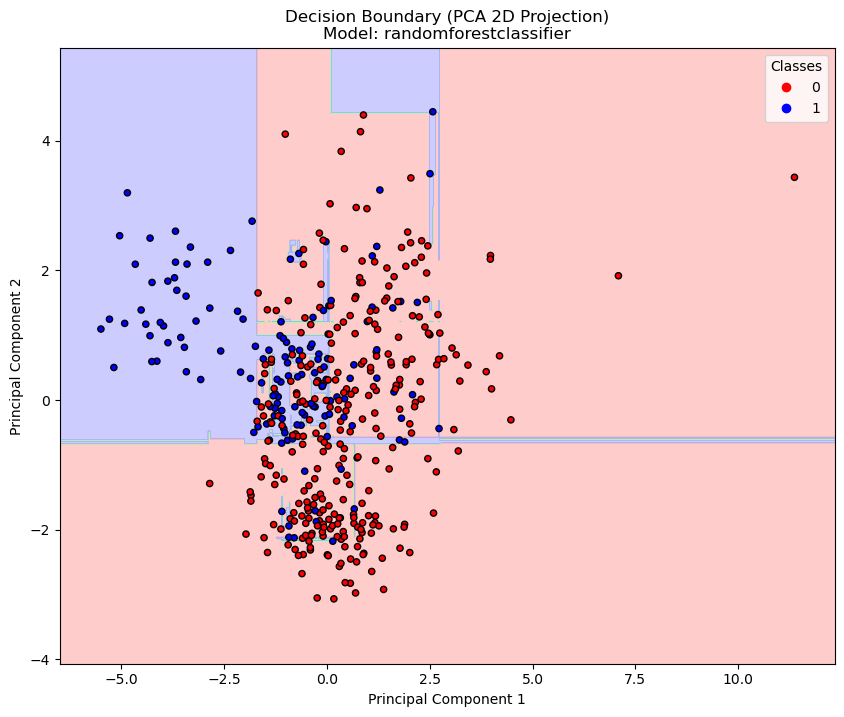

Note: The 2D plot represents 55.94% of the original data variance.
name model:  gradientboostingclassifier

evaluation:  {'accuracy': 0.7786259541984732, 'f1_weighted': 0.7559679437542032}



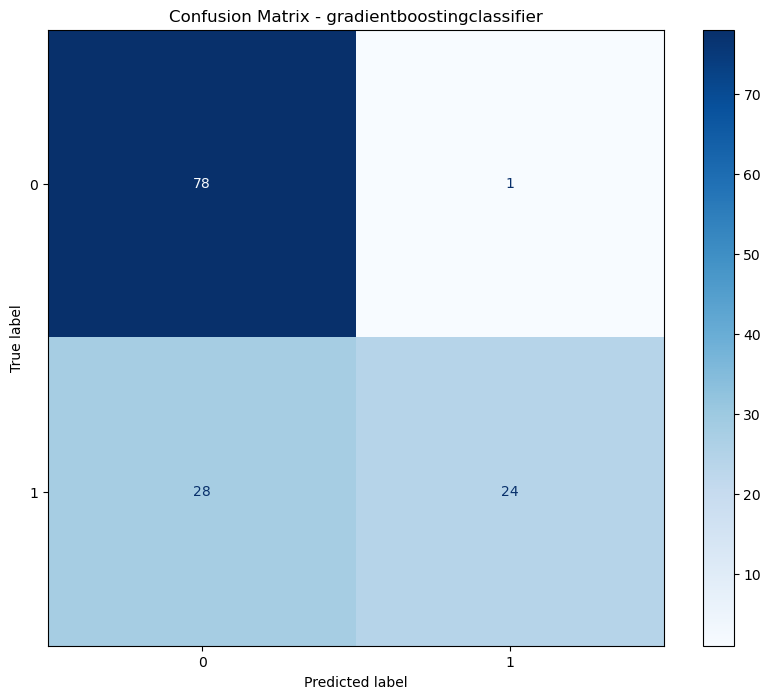

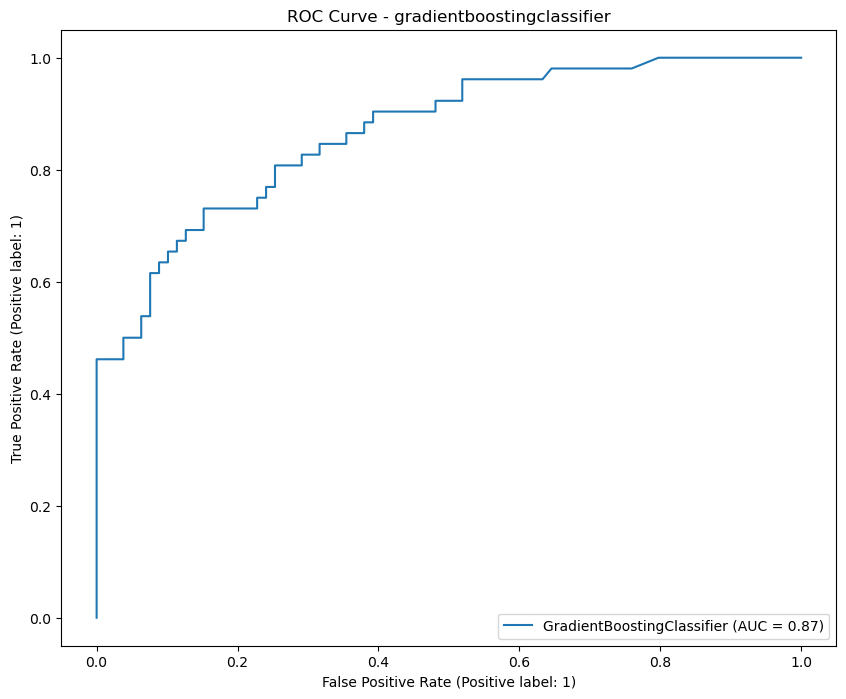

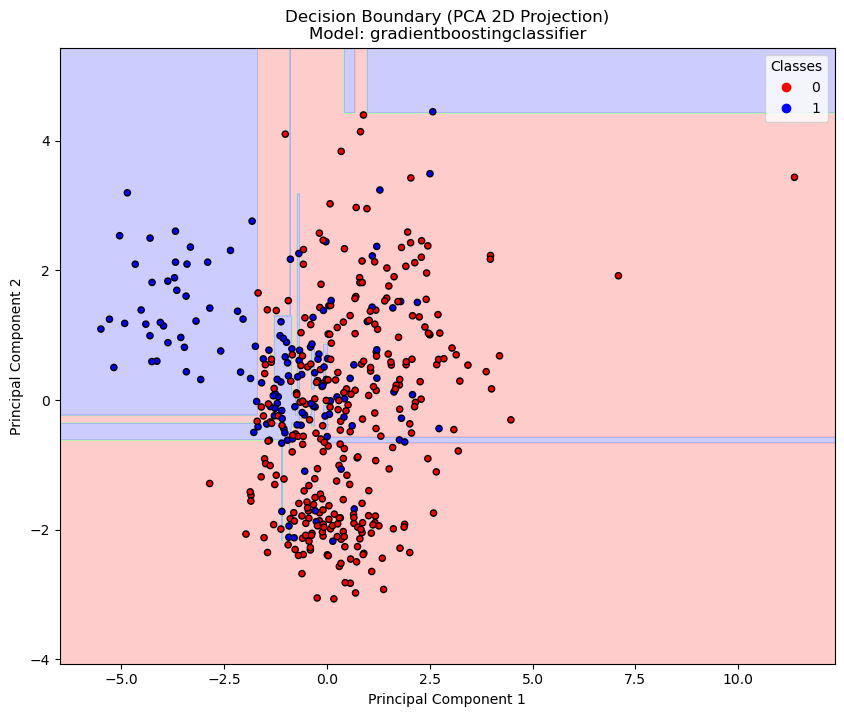

Note: The 2D plot represents 55.94% of the original data variance.
name model:  histgradientboostingclassifier

evaluation:  {'accuracy': 0.7786259541984732, 'f1_weighted': 0.7612615075255482}



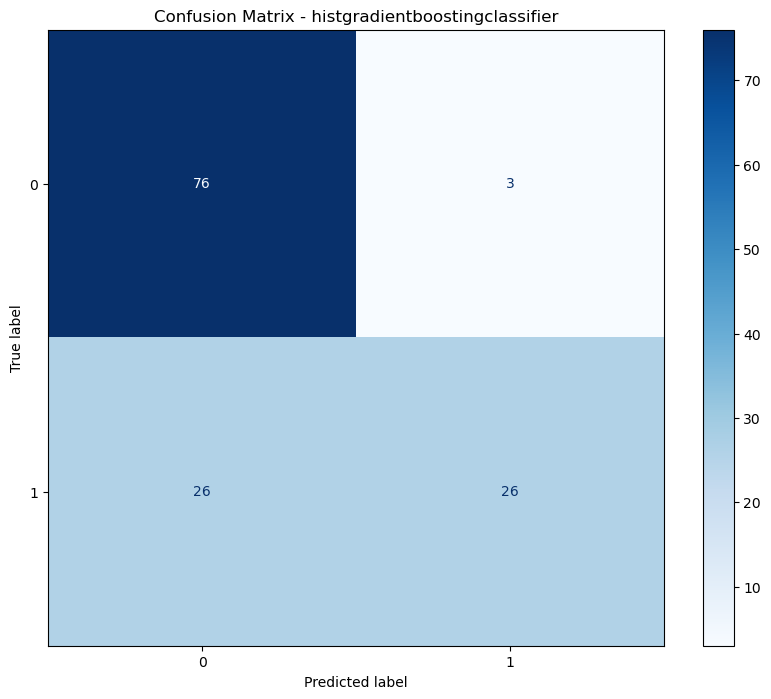

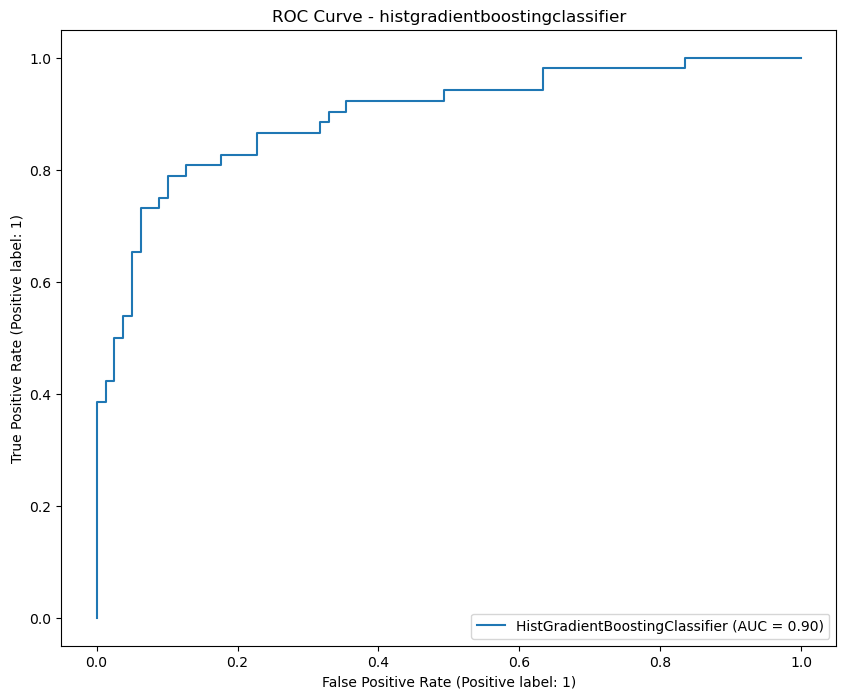

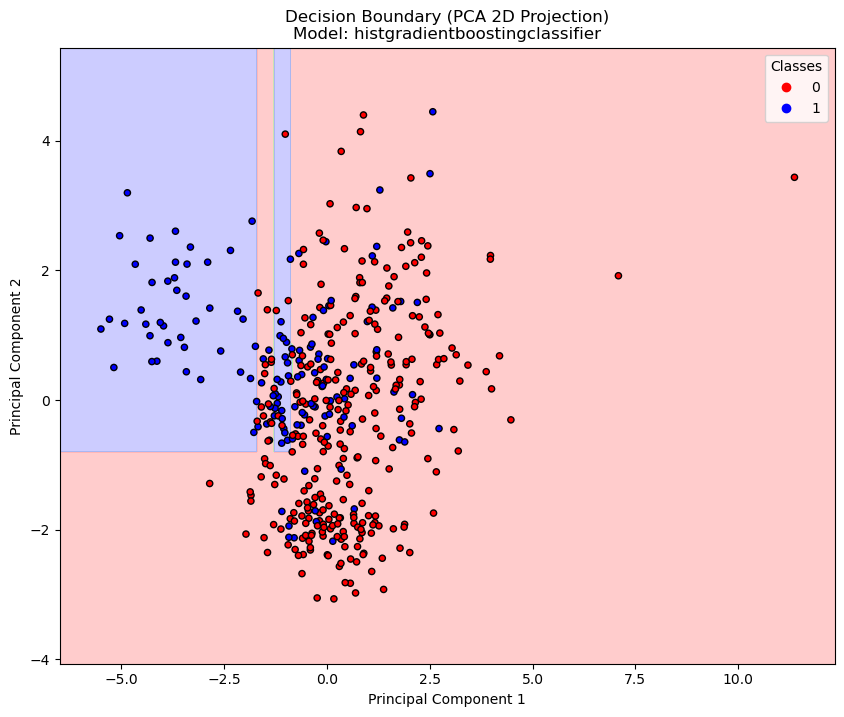

Note: The 2D plot represents 55.94% of the original data variance.
name model:  knnclassifier

evaluation:  {'accuracy': 0.7938931297709924, 'f1_weighted': 0.7799094368861005}



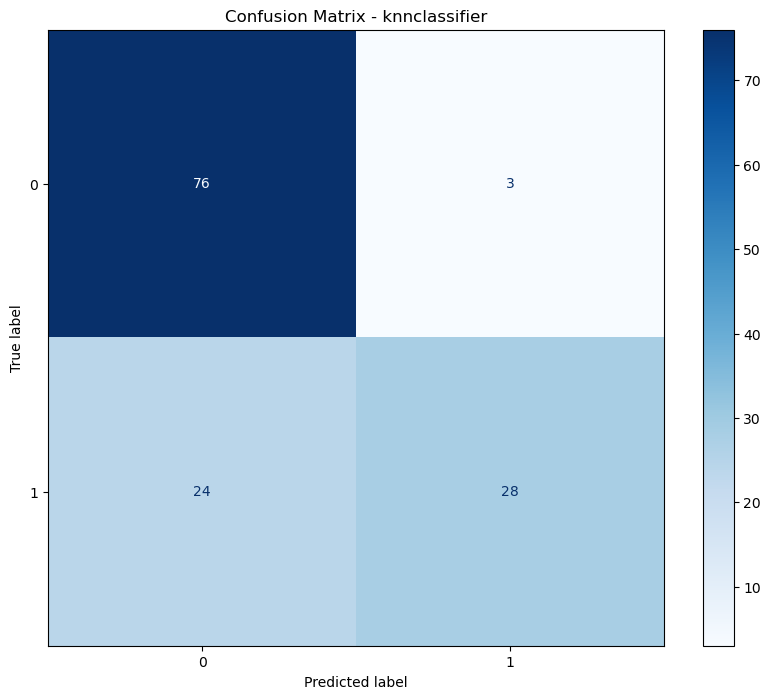

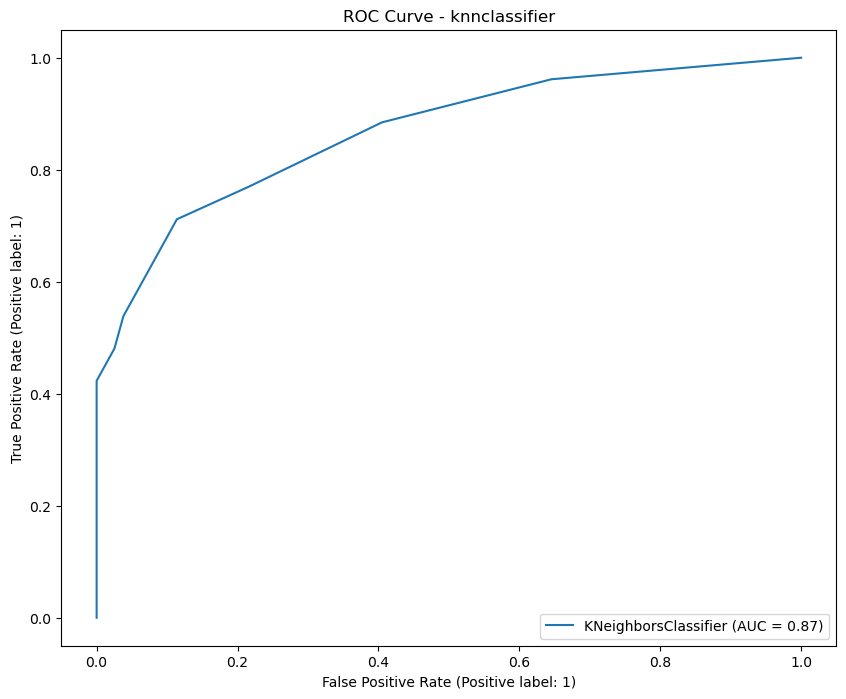

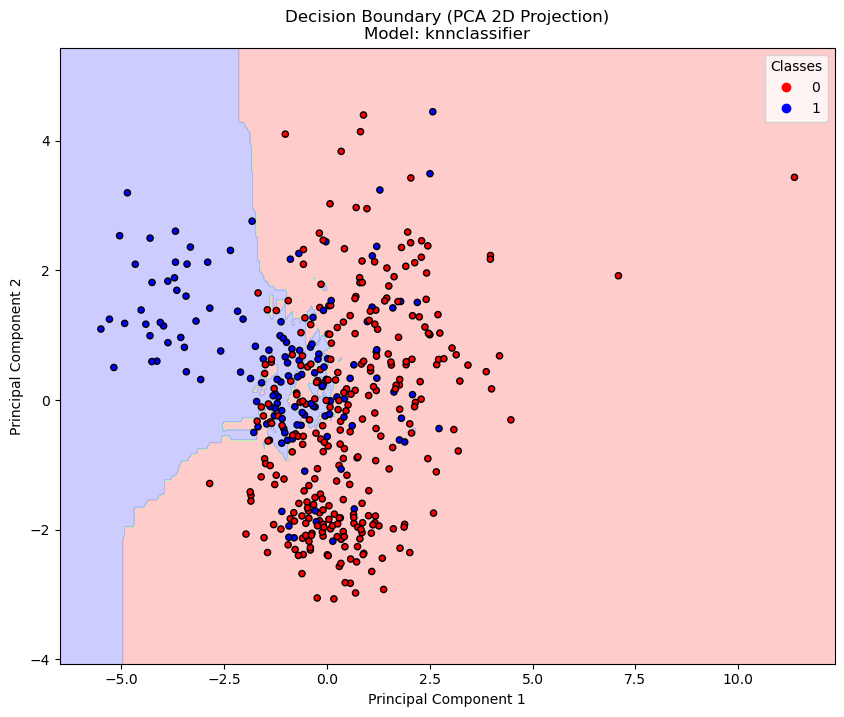

Note: The 2D plot represents 55.94% of the original data variance.


/Users/leonardvincentramil/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leonardvincentramil/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leonardvincentramil/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leonardvincentramil/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The lo

name model:  sgdclassifier

evaluation:  {'accuracy': 0.7786259541984732, 'f1_weighted': 0.752992339197997}



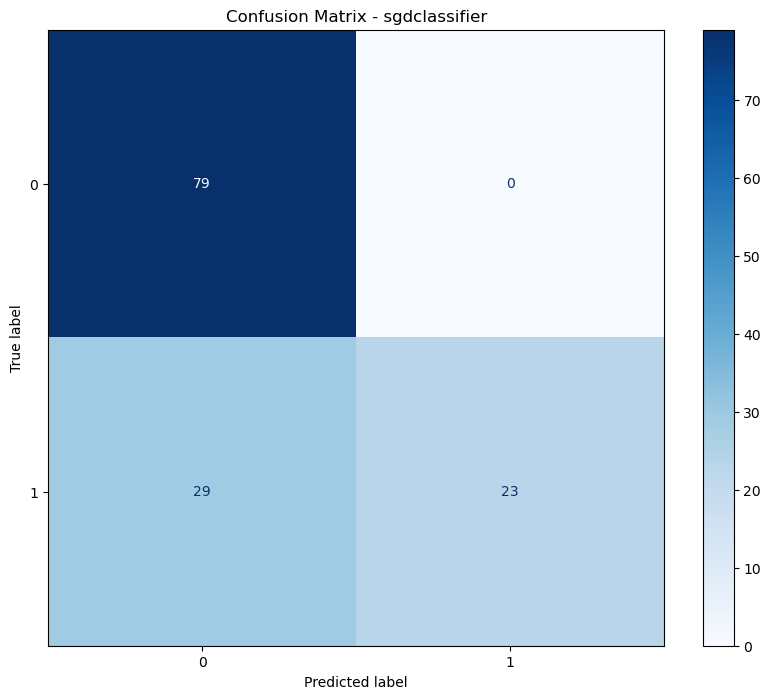

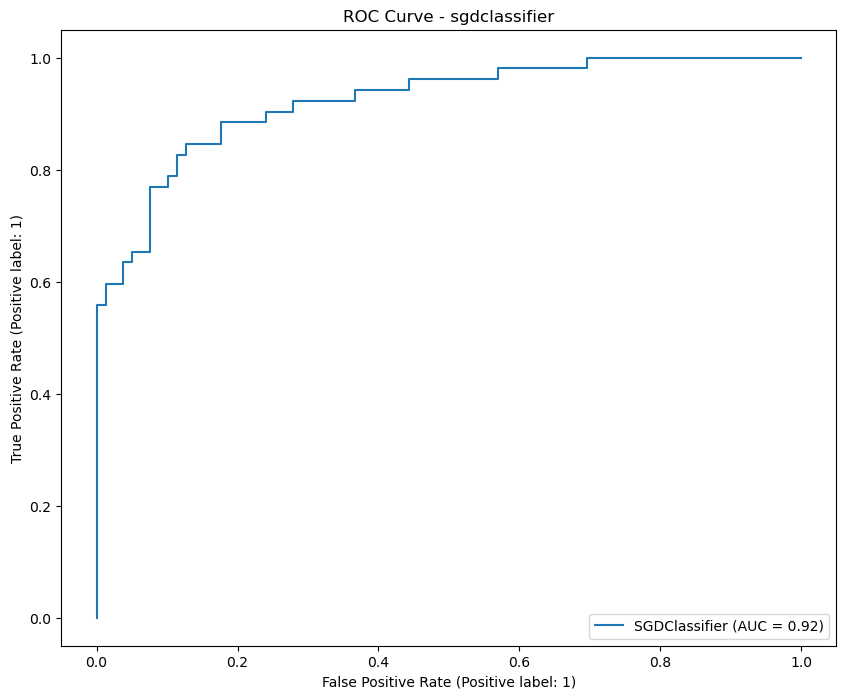

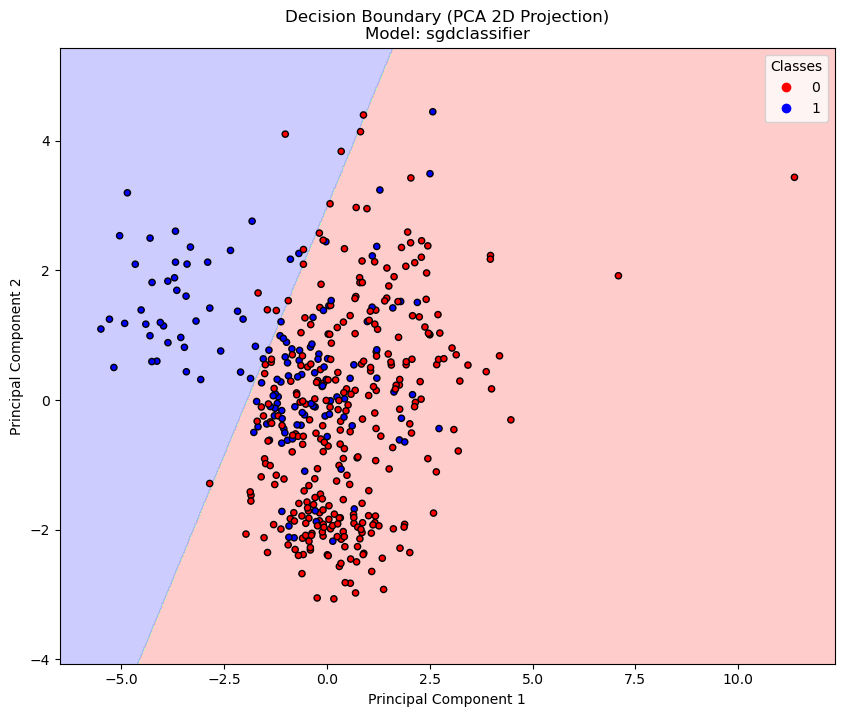

Note: The 2D plot represents 55.94% of the original data variance.


In [4]:
import joblib
from pathlib import Path


for name_model in ['logisticregression', 'ridgeclassifier', 'svc',
                   'randomforestclassifier', 'gradientboostingclassifier', 'histgradientboostingclassifier',
                   'knnclassifier', 'sgdclassifier']:
    # Istanzia e allena
    model_init = model_ML.MLModelClassifier(X_train, y_train, name_model)
    y_pred, model = model_init.train()


    # Stampa i risultati
    print(f'name model:  {name_model}\n')
    print(f'evaluation:  {model_init.evaluate()}\n')

    model_init.plot_confusion_matrix()
    model_init.plot_roc_curve()
    model_init.plot_decision_boundaries()

    # Salva il modello
    #file_path = models_dir / f'{name_model}.pkl'
    #joblib.dump(model, file_path)
    #print(f'Modello salvato in: {file_path}\n')
